In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


# Tutorial

In [2]:
import pandas as pd
from sklearn.metrics import accuracy_score
train_data=pd.read_csv('/kaggle/input/titanic/train.csv')
test_data=pd.read_csv('/kaggle/input/titanic/test.csv')
df_sub=pd.read_csv('/kaggle/input/titanic/gender_submission.csv')

In [3]:
women = train_data.loc[train_data.Sex == 'female']["Survived"]
rate_women = sum(women)/len(women)

print("% of women who survived:", rate_women)

% of women who survived: 0.7420382165605095


In [4]:
men = train_data.loc[train_data.Sex == 'male']["Survived"]
rate_men = sum(men)/len(men)

print("% of men who survived:", rate_men)

% of men who survived: 0.18890814558058924


In [5]:
from sklearn.ensemble import RandomForestClassifier

y = train_data["Survived"]

features = ["Pclass", "Sex", "SibSp", "Parch"]
X = pd.get_dummies(train_data[features])
X_test = pd.get_dummies(test_data[features])

model = RandomForestClassifier(n_estimators=100, max_depth=5,random_state=1)
model.fit(X, y)
predictions = model.predict(X_test)

output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
# output.to_csv('submission.csv', index=False)
# print("Your submission was successfully saved!")
before=accuracy_score(df_sub['Survived'],output['Survived'])
print("Accuracy score for given submission file is = "+str(before))

Accuracy score for given submission file is = 0.9712918660287081


# Contribution
**Analyzing, drawing insights and improving previous accuracy of 0.9712918660287081%**

Data Preprocessing (Handling missing values with imputation, changing continous to categorical data and labelling) 
> *Analyzing for Age and Fare*

In [6]:
# all missing values 
print("Nan's in train age column = "+str(train_data.Age.isna().sum() ))
print("Nan's in test age column = "+str(test_data.Age.isna().sum() ))
print("Nan's in train Fare column = "+str(train_data.Fare.isna().sum() ))
print("Nan's in test Fare column = "+str(test_data.Fare.isna().sum() ))

# changin data type
print("Age data in train set is of type "+ str(train_data.Age.dtype))
print("Age data in test set is of type "+ str(test_data.Age.dtype))


Nan's in train age column = 177
Nan's in test age column = 86
Nan's in train Fare column = 0
Nan's in test Fare column = 1
Age data in train set is of type float64
Age data in test set is of type float64


In [7]:
# preprocessing age feature to add to our random forest model

# imputing missing age with mode, changing data type, 
# converting continous to categorical for train 

train_data["Age"].fillna(train_data["Age"].mode()[0],inplace=True)
train_data=train_data.astype({'Age':int})
train_data['Age'] = pd.cut(train_data['Age'], bins=[0,19,55,80],labels=['Teen','Adult','Elder'])

# imputing missing age with mode, changing data type, 
# converting continous to categorical for test
test_data["Age"].fillna(test_data["Age"].mode()[0],inplace=True)
test_data=test_data.astype({'Age':int})
test_data['Age'] = pd.cut(test_data['Age'], bins=[0,19,55,80],labels=['Teen','Adult','Elder'])


In [8]:
# preprocessing Fare feature to add to our random forest model

# imputing missing Fare with mean, 
# converting continous to categorical for train 

test_data["Fare"].fillna(test_data["Fare"].mean(),inplace=True) #no missing values in train set
train_data['Fare'] = pd.cut(train_data['Fare'], bins=[0,50,150,513],labels=['Less Expensive','More Expensive','Most Expensive'])
test_data['Fare'] = pd.cut(test_data['Fare'], bins=[0,50,150,513],labels=['Less Expensive','More Expensive','Most Expensive'])

# Statistics for Fare and Age Groups in terms of Survival

In [9]:
# calculating Fare vs Survive

print("Percentage of People of Fare group Died:")
not_survived=train_data[train_data['Survived']==0].Fare.value_counts()/train_data.Fare.value_counts()
print(not_survived)
print("Percentage of People of Fare group Survived:")
survived=train_data[train_data['Survived']==1].Fare.value_counts()/train_data.Fare.value_counts()
print(survived)
# we can say that people who brought Most Expensive ticket had more chance of survival

Percentage of People of Fare group Died:
Less Expensive    0.675978
More Expensive    0.320611
Most Expensive    0.310345
Name: Fare, dtype: float64
Percentage of People of Fare group Survived:
Less Expensive    0.324022
More Expensive    0.679389
Most Expensive    0.689655
Name: Fare, dtype: float64


In [10]:
survived['Less Expensive']

0.3240223463687151

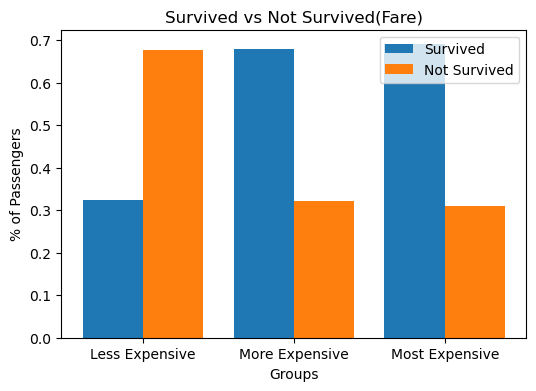

In [11]:
import matplotlib.pyplot as plt
import numpy as np
fig = plt.figure(figsize = (6, 4))
X = survived.index
sv= survived.values
nsv = not_survived.values
  
X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, sv, 0.4, label = 'Survived')
plt.bar(X_axis + 0.2, nsv, 0.4, label = 'Not Survived')
  
plt.xticks(X_axis, X)
plt.xlabel("Groups")
plt.ylabel("% of Passengers")
plt.title("Survived vs Not Survived(Fare)")
plt.legend()
plt.show()

In [12]:

# calculating Age vs Survive

print("Percentage of People of Age group Died:")
ansv=train_data[train_data['Survived']==0].Age.value_counts()/train_data.Age.value_counts()
print(ansv)

print("Percentage of People of Age group Survived:")
asv=train_data[train_data['Survived']==1].Age.value_counts()/train_data.Age.value_counts()
print(asv)

# we can say that Elder people could not handle the titanic accident the most.

Percentage of People of Age group Died:
Adult    0.635174
Teen     0.541401
Elder    0.692308
Name: Age, dtype: float64
Percentage of People of Age group Survived:
Adult    0.364826
Teen     0.458599
Elder    0.307692
Name: Age, dtype: float64


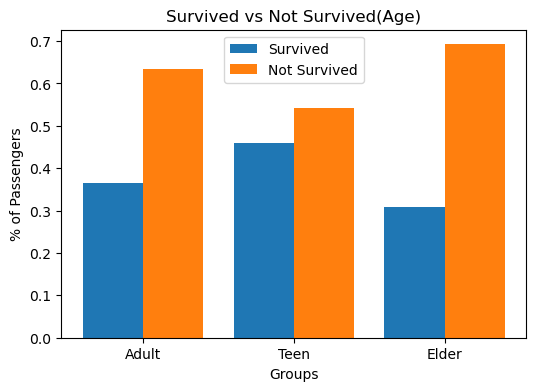

In [13]:
import matplotlib.pyplot as plt
import numpy as np
fig = plt.figure(figsize = (6, 4))
X = asv.index
sv= asv.values
nsv = ansv.values
  
X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, sv, 0.4, label = 'Survived')
plt.bar(X_axis + 0.2, nsv, 0.4, label = 'Not Survived')
  
plt.xticks(X_axis, X)
plt.xlabel("Groups")
plt.ylabel("% of Passengers")
plt.title("Survived vs Not Survived(Age)")
plt.legend()
plt.show()

In [14]:
from sklearn.ensemble import RandomForestClassifier

y = train_data["Survived"]

features = ["Pclass", "Sex", "SibSp", "Parch","Fare","Age"] #added preprocessed Fare and Age columns
X = pd.get_dummies(train_data[features])
X_test = pd.get_dummies(test_data[features])

model = RandomForestClassifier(n_estimators=100, max_depth=5,random_state=1)
model.fit(X, y)
predictions = model.predict(X_test)

output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")
after=accuracy_score(df_sub['Survived'],output['Survived'])
print("Accuracy score for given submission file is = "+str(after))

Your submission was successfully saved!
Accuracy score for given submission file is = 0.9832535885167464


In [15]:
# improvement in accuracy score 

improved_accuracy_score=after-before

print("Increment in score is "+str(improved_accuracy_score))


Increment in score is 0.011961722488038284


In [16]:
# 0.9712918660287081 is given submission csv's accuracy score
# improved more
# added Fare feature to improve accuracy till 0.9760765550239234 for random state=1
# 0.9832535885167464 when fare and age are added
# when adding 'embarked' feature the accuracy of the model decreases drastically to 0.9425837320574163
# so we better do not touch embarked

# why order changes accuracy ?
# You've set the seed of the random forest explicitly. 
# This means that the same randomization is used. 
# Part of the randomization procedure of a random forest is to construct boot-strapped samples of the data.